100000


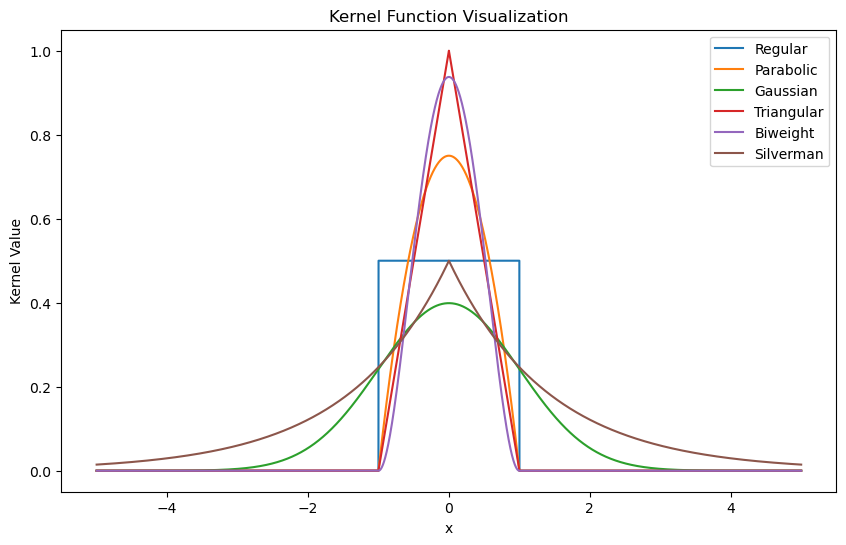

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def relagular_kernel(x):
    return 0.5 * np.where(abs(x) < 1, 1, 0)

def parabolic(x):
    # Epanechnikov kernel
    return (3/4) * (1 - x**2) if abs(x) < 1 else 0

def gaussian_kernel(x):
    # Standard Gaussian
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

def triangular_kernel(x):
    # Triangular kernel
    return (1 - abs(x)) if abs(x) < 1 else 0

def bivveigh(x):
    # Biweight kernel
    return (15/16) * (1 - x**2)**2 if abs(x) < 1 else 0

def silverman_kernel(x):
    # Example Silverman-style kernel
    return 0.5 * np.exp(-abs(x)/np.sqrt(2))

# Example visualization
x_values = np.linspace(-5, 5, 10**5)
print(len(x_values))
ref_value = 0

kernels = {
    "relagular": [],
    "parabolic": [],
    "gaussian": [],
    "triangular": [],
    "bivveigh": [],
    "silverman": []
}

for x in x_values:
    shift = x - ref_value
    kernels["relagular"].append(relagular_kernel(shift))
    kernels["parabolic"].append(parabolic(shift))
    kernels["gaussian"].append(gaussian_kernel(shift))
    kernels["triangular"].append(triangular_kernel(shift))
    kernels["bivveigh"].append(bivveigh(shift))
    kernels["silverman"].append(silverman_kernel(shift))

plt.figure(figsize=(10,6))
plt.plot(x_values, kernels["relagular"], label="Regular")
plt.plot(x_values, kernels["parabolic"], label="Parabolic")
plt.plot(x_values, kernels["gaussian"], label="Gaussian")
plt.plot(x_values, kernels["triangular"], label="Triangular")
plt.plot(x_values, kernels["bivveigh"], label="Biweight")
plt.plot(x_values, kernels["silverman"], label="Silverman")
plt.title("Kernel Function Visualization")
plt.xlabel("x")
plt.ylabel("Kernel Value")
plt.legend()
plt.show()

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset

class RainDropDataset(Dataset):
    def __init__(self, rainy_dir, gt_dirs, transform=None):
        """
        rainy_dir: đường dẫn đến folder chứa tất cả ảnh mưa (chỉ có 1 folder với nhiều ảnh)
        gt_dirs: danh sách đường dẫn đến folder GT (các dataset Day và Night)
                 mỗi folder GT có cấu trúc: .../Clear/00001, .../Clear/00002, ...,...
                 sẽ lấy ảnh đầu tiên trong mỗi subfolder (sau đó sort trước khi gộp)
        transform: các phép biến đổi ảnh
        """
        self.transform = transform
        
        # Lấy danh sách ảnh mưa từ folder (sort theo tên)
        self.rainy_images = sorted([
            os.path.join(rainy_dir, fname) 
            for fname in os.listdir(rainy_dir) 
            if os.path.isfile(os.path.join(rainy_dir, fname))
        ])
        
        # Lấy danh sách ảnh GT từ mỗi folder trong gt_dirs
        self.gt_images = []
        for gt_dir in gt_dirs:
            if os.path.exists(gt_dir):
                # Lấy danh sách subfolder (ví dụ: 00001, 00002, ...)
                subfolders = sorted(os.listdir(gt_dir))
                for sub in subfolders:
                    sub_path = os.path.join(gt_dir, sub)
                    if os.path.isdir(sub_path):
                        imgs = sorted(os.listdir(sub_path))
                        if imgs:
                            # Lấy ảnh đầu tiên trong subfolder
                            self.gt_images.append(os.path.join(sub_path, imgs[0]))
        
        # Gộp các dataset GT (đã sort riêng rồi)
        if len(self.rainy_images) != len(self.gt_images):
            print(f"Warning: Số lượng ảnh mưa ({len(self.rainy_images)}) không khớp với số ảnh GT ({len(self.gt_images)})!")
    
    def __len__(self):
        return min(len(self.rainy_images), len(self.gt_images))
    
    def __getitem__(self, idx):
        rainy_img_path = self.rainy_images[idx]
        gt_img_path = self.gt_images[idx]
        
        rainy_img = Image.open(rainy_img_path).convert("RGB")
        gt_img = Image.open(gt_img_path).convert("RGB")
        
        if self.transform:
            rainy_img = self.transform(rainy_img)
            gt_img = self.transform(gt_img)
        
        return rainy_img, gt_img

# === Test: chạy và hiển thị xem input và GT có match với nhau không ===
if __name__ == '__main__':
    import torchvision.transforms as transforms
    import matplotlib.pyplot as plt
    import torch

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    # Đường dẫn mẫu: cập nhật đường dẫn thật của bạn
    rainy_dir = '/kaggle/input/raindrop-daynight/rainy'  # folder chứa ảnh mưa
    day_gt_dir = '/kaggle/input/raindrop-daynight/DayRainDrop_Train/DayRainDrop_Train/Clear'
    night_gt_dir = '/kaggle/input/raindrop-daynight/NightRainDrop_Train/NightRainDrop_Train/Clear'

    dataset = RainDropDataset(rainy_dir, [day_gt_dir, night_gt_dir], transform=transform)
    print(f"Số lượng mẫu: {len(dataset)}")
    
    # Lấy một mẫu và hiển thị
    rainy_img, gt_img = dataset[0]

    # Nếu ảnh là tensor, chuyển sang numpy để hiển thị
    if isinstance(rainy_img, torch.Tensor):
        rainy_img = rainy_img.permute(1,2,0).numpy()
    if isinstance(gt_img, torch.Tensor):
        gt_img = gt_img.permute(1,2,0).numpy()

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(rainy_img)
    axs[0].set_title("Rainy Input")
    axs[0].axis("off")
    axs[1].imshow(gt_img)
    axs[1].set_title("GT Image")
    axs[1].axis("off")
    plt.show()


In [ ]:
# class RainDropDataset(Dataset):
#     def __init__(self, root_dirs, transform=None, new_data_dirs = None):
#         """
#         root_dirs: danh sách chứa nhiều đường dẫn đến dataset
#         transform: phép biến đổi ảnh
#         """
#         self.image_paths = []  # Danh sách lưu đường dẫn ảnh
#         self.transform = transform
# 
#         # Lặp qua từng đường dẫn dataset (Day/Night)
#         for root_dir in root_dirs:
#             blur_dir = os.path.join(root_dir, "Blur")
#             clear_dir = os.path.join(root_dir, "Clear")
# 
#             # Lấy danh sách thư mục con
#             folders = sorted(os.listdir(blur_dir))
# 
#             for folder_name in folders:
#                 blur_folder = os.path.join(blur_dir, folder_name)
#                 clear_folder = os.path.join(clear_dir, folder_name)
# 
#                 blur_images = sorted(os.listdir(blur_folder))
#                 clear_images = sorted(os.listdir(clear_folder))
# 
#                 # Kiểm tra số ảnh có khớp không
#                 assert len(blur_images) == len(clear_images), f"Lỗi: {folder_name} có số ảnh không khớp!"
# 
#                 for img_name in blur_images:
#                     self.image_paths.append((blur_folder, clear_folder, img_name))  # Chỉ lưu ảnh gốc
# 
#         if new_data_dirs:
#             data_dir = os.path.join(new_data_dirs, "data")  # Dữ liệu ảnh mưa
#             gt_dir = os.path.join(new_data_dirs, "gt")  # Dữ liệu ảnh sạch
# 
#             data_images = sorted(os.listdir(data_dir))
#             gt_images = sorted(os.listdir(gt_dir))
# 
#             # Kiểm tra số ảnh có khớp không
#             assert len(data_images) == len(gt_images), "Số lượng ảnh trong data và gt không khớp!"
# 
#             for data_img_name, gt_img_name in zip(data_images, gt_images):
#                 self.image_paths.append((data_dir, gt_dir, data_img_name))  # Thêm ảnh mới
# 
#     def __len__(self):
#         return len(self.image_paths)
# 
#     def __getitem__(self, idx):
#         blur_folder, clear_folder, img_name = self.image_paths[idx]
# 
#         blur_img_path = os.path.join(blur_folder, img_name)
#         clear_img_path = os.path.join(clear_folder, img_name)
# 
#         blur_img = Image.open(blur_img_path).convert("RGB")
#         clear_img = Image.open(clear_img_path).convert("RGB")
# 
#         # Apply transformations
#         if self.transform:
#             blur_img = self.transform(blur_img)
#             clear_img = self.transform(clear_img)
# 
#         return blur_img, clear_img